In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the file
ub=pd.read_csv("D:\\Downloads\\KAGGLE PROJECT\\UberDataset.csv")

In [3]:
ub

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
# top 5 columns
ub.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# last 5 records

ub.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
# columns the name
ub.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [9]:
# Number of columns & rows
print("Number of rows :",ub.shape[0])
print("Number of columns :",ub.shape[1])

Number of rows : 1156
Number of columns : 7


In [10]:
# information of data set
ub.info()
# we have 6 object columns & 1 is float column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
# describe the dataset
ub.describe()
# it is doesnot show the object values

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
ub.describe(include="object")

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE
count,1156,1155,1155,1155,1155,653
unique,1155,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


In [13]:
# we are check the missing value
ub.isna()
# it show any true value its means missing value this place

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [15]:
ub.isna().sum()
# i found the missing value

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [32]:
# lets fill the missing values
ub['END_DATE'].mode([0])

0    6/28/2016 23:59
Name: END_DATE, dtype: object

In [34]:
ub['END_DATE'].fillna('6/28/2016 23:59',inplace=True)

In [44]:
ub['END_DATE'].isna().sum()

0

In [47]:
ub['CATEGORY'].fillna(ub['CATEGORY'].mode()[0],inplace=True)
ub['START'].fillna(ub['START'].mode()[0],inplace=True)
ub['STOP'].fillna(ub['STOP'].mode()[0],inplace=True)
ub['PURPOSE'].fillna(ub['PURPOSE'].mode()[0],inplace=True)

In [48]:
# lets check the again missing value
ub.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
# MATHPLOT

In [51]:
ub['PURPOSE'].value_counts()

Meeting            690
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

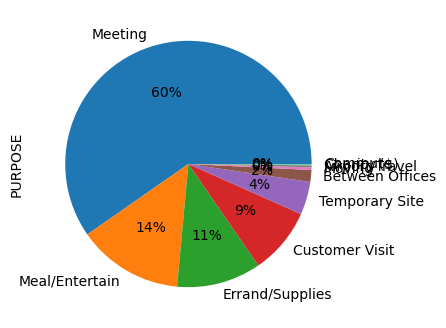

In [62]:
plt.figure(figsize=(4,4))
ub['PURPOSE'].value_counts().plot.pie(autopct="%1.0f%%")
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


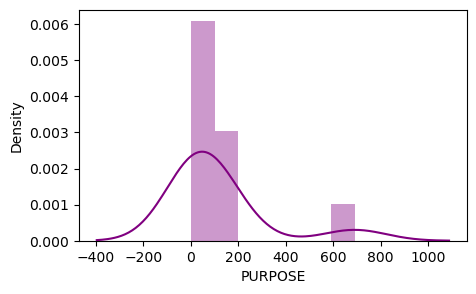

In [85]:
plt.figure(figsize=(5,3))
sns.distplot(ub['PURPOSE'].value_counts(),color='purple')
plt.show()

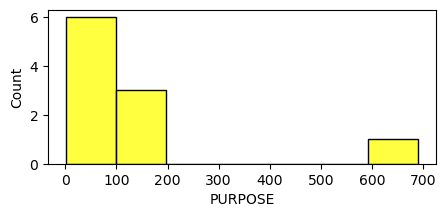

In [82]:
plt.figure(figsize=(5,2))
sns.histplot(ub['PURPOSE'].value_counts(),color='yellow')
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


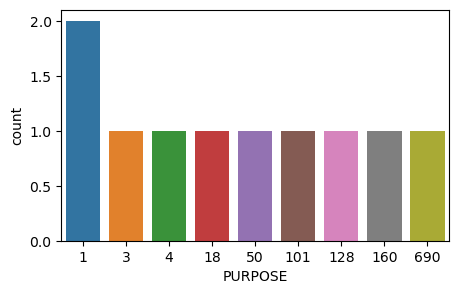

In [88]:
plt.figure(figsize=(5,3))
sns.countplot(ub['PURPOSE'].value_counts())
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


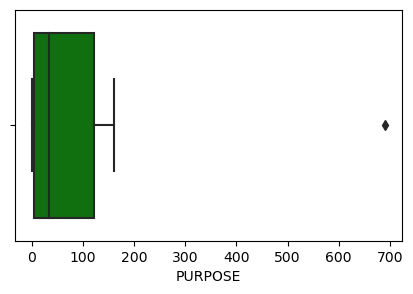

In [91]:
plt.figure(figsize=(5,3))
sns.boxplot(ub['PURPOSE'].value_counts(),color='green')
plt.show()

In [92]:
ub.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [93]:
ub['START_DATE'].value_counts()

6/28/2016 23:34     2
01-01-2016 21:11    1
9/27/2016 21:01     1
9/27/2016 13:21     1
9/27/2016 8:33      1
                   ..
5/27/2016 20:47     1
5/27/2016 20:26     1
5/23/2016 21:09     1
5/23/2016 20:19     1
Totals              1
Name: START_DATE, Length: 1155, dtype: int64

In [94]:
ub['END_DATE'].value_counts()

6/28/2016 23:59     3
01-01-2016 21:17    1
9/28/2016 2:37      1
9/27/2016 14:43     1
9/27/2016 8:35      1
                   ..
5/27/2016 20:53     1
5/27/2016 20:30     1
5/23/2016 21:21     1
5/23/2016 20:27     1
12/31/2016 23:51    1
Name: END_DATE, Length: 1154, dtype: int64

In [95]:
ub['CATEGORY'].value_counts()

Business    1079
Personal      77
Name: CATEGORY, dtype: int64

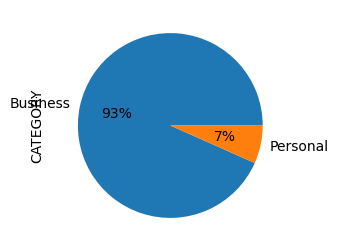

In [110]:
plt.figure(figsize=(5,3))
ub['CATEGORY'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

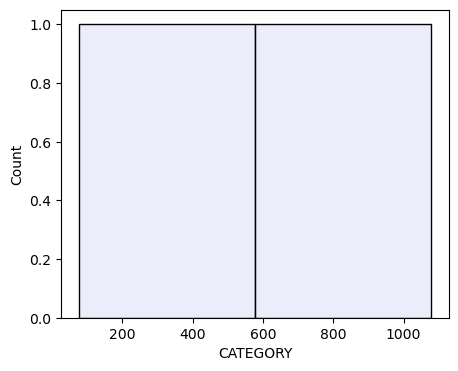

In [120]:
plt.figure(figsize=(5,4))
sns.histplot(ub['CATEGORY'].value_counts(),color='lavender')
plt.show()

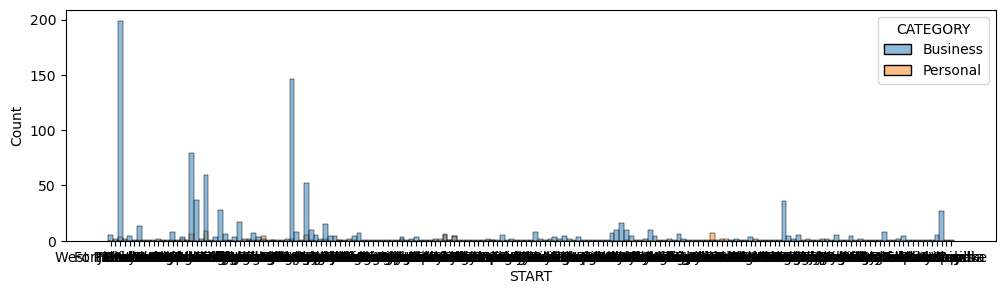

In [126]:
plt.figure(figsize=(12,3))
sns.histplot(data=ub,x='START',hue='CATEGORY',color='pink')
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


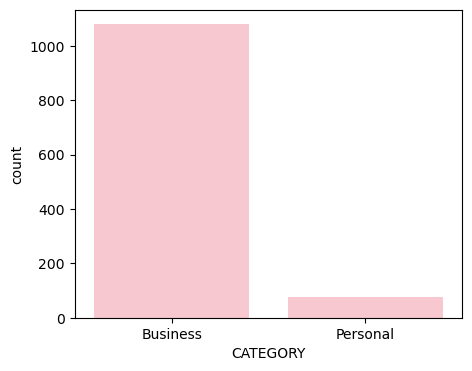

In [119]:
plt.figure(figsize=(5,4))
sns.countplot(ub['CATEGORY'],color='pink')
plt.show()

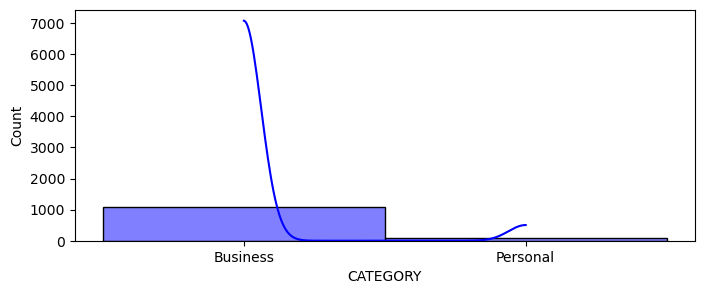

In [111]:
plt.figure(figsize=(8,3))
sns.histplot(ub["CATEGORY"],kde=True,color="blue")
plt.show()

In [96]:
ub['START'].value_counts()

Cary                202
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [97]:
ub['STOP'].value_counts()

Cary                 204
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [98]:
ub['MILES'].value_counts()

9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: MILES, Length: 257, dtype: int64

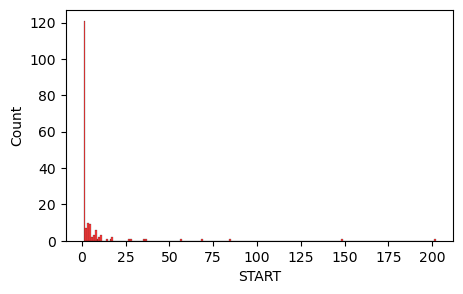

In [129]:
plt.figure(figsize=(5,3))
sns.histplot(ub['START'].value_counts(),color='red')
plt.show()

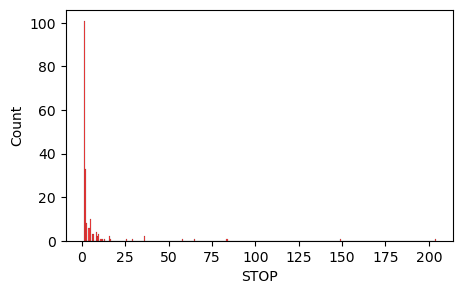

In [128]:
plt.figure(figsize=(5,3))
sns.histplot(ub['STOP'].value_counts(),color='red')
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


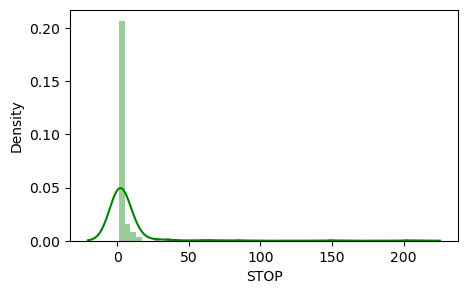

In [130]:
plt.figure(figsize=(5,3))
sns.distplot(ub['STOP'].value_counts(),color='green')
plt.show()

C:\Users\15-R\anaconda3.a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


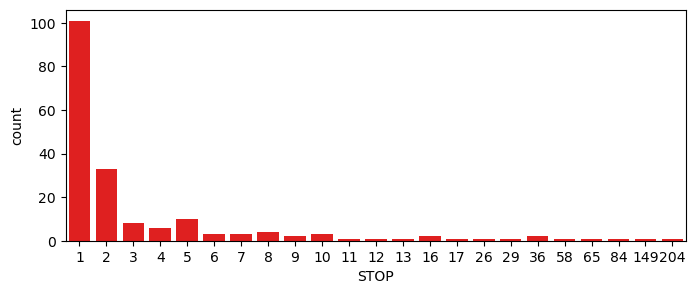

In [132]:
plt.figure(figsize=(8,3))
sns.countplot(ub['STOP'].value_counts(),color='red')
plt.show()

In [135]:
ub[['START','STOP']].head()

,START,STOP
0,Fort Pierce,Fort Pierce
1,Fort Pierce,Fort Pierce
2,Fort Pierce,Fort Pierce
3,Fort Pierce,Fort Pierce
4,Fort Pierce,West Palm Beach


In [137]:
ub[['START_DATE','START','STOP']].head()

,START_DATE,START,STOP
0,01-01-2016 21:11,Fort Pierce,Fort Pierce
1,01-02-2016 01:25,Fort Pierce,Fort Pierce
2,01-02-2016 20:25,Fort Pierce,Fort Pierce
3,01-05-2016 17:31,Fort Pierce,Fort Pierce
4,01-06-2016 14:42,Fort Pierce,West Palm Beach


In [139]:
ub[2:6]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [141]:
ub.groupby('CATEGORY')['PURPOSE'].sum()

CATEGORY
Business    Meal/EntertainMeetingErrand/SuppliesMeetingCus...
Personal    MeetingMeetingMeetingMeetingMeetingMeetingMeet...
Name: PURPOSE, dtype: object

In [160]:
ub.groupby('CATEGORY')['PURPOSE'].count()

CATEGORY
Business    1079
Personal      77
Name: PURPOSE, dtype: int64

In [158]:
ub.groupby('PURPOSE')['CATEGORY'].sum()

PURPOSE
Airport/Travel                              BusinessBusinessBusiness
Between Offices    BusinessBusinessBusinessBusinessBusinessBusine...
Charity ($)                                                 Personal
Commute                                                     Personal
Customer Visit     BusinessBusinessBusinessBusinessBusinessBusine...
Errand/Supplies    BusinessBusinessBusinessBusinessBusinessBusine...
Meal/Entertain     BusinessBusinessBusinessBusinessBusinessBusine...
Meeting            BusinessBusinessBusinessBusinessBusinessBusine...
Moving                              PersonalPersonalPersonalPersonal
Temporary Site     BusinessBusinessBusinessBusinessBusinessBusine...
Name: CATEGORY, dtype: object

In [159]:
ub.groupby('PURPOSE')['CATEGORY'].count()

PURPOSE
Airport/Travel       3
Between Offices     18
Charity ($)          1
Commute              1
Customer Visit     101
Errand/Supplies    128
Meal/Entertain     160
Meeting            690
Moving               4
Temporary Site      50
Name: CATEGORY, dtype: int64

In [145]:
ub.groupby(['START_DATE','END_DATE'])['CATEGORY'].sum().head()

START_DATE        END_DATE        
01-01-2016 21:11  01-01-2016 21:17    Business
01-02-2016 01:25  01-02-2016 01:37    Business
01-02-2016 20:25  01-02-2016 20:38    Business
01-05-2016 17:31  01-05-2016 17:45    Business
01-06-2016 14:42  01-06-2016 15:49    Business
Name: CATEGORY, dtype: object

In [162]:
ub.groupby(['START_DATE','END_DATE'])['CATEGORY'].count()

START_DATE        END_DATE        
01-01-2016 21:11  01-01-2016 21:17    1
01-02-2016 01:25  01-02-2016 01:37    1
01-02-2016 20:25  01-02-2016 20:38    1
01-05-2016 17:31  01-05-2016 17:45    1
01-06-2016 14:42  01-06-2016 15:49    1
                                     ..
9/28/2016 17:21   9/28/2016 19:36     1
9/29/2016 16:13   9/29/2016 18:47     1
9/30/2016 17:39   9/30/2016 20:20     1
9/30/2016 20:59   9/30/2016 22:34     1
Totals            6/28/2016 23:59     1
Name: CATEGORY, Length: 1155, dtype: int64

In [153]:
ub.groupby(['START_DATE','END_DATE'])['CATEGORY'].sum().unstack().head()

END_DATE,01-01-2016 21:17,01-02-2016 01:37,01-02-2016 20:38,01-05-2016 17:45,01-06-2016 15:49,01-06-2016 17:19,01-06-2016 17:35,01-07-2016 13:33,01-10-2016 08:25,01-10-2016 12:44,...,9/24/2016 15:15,9/24/2016 20:33,9/27/2016 14:43,9/27/2016 20:34,9/27/2016 8:35,9/28/2016 19:36,9/28/2016 2:37,9/29/2016 18:47,9/30/2016 20:20,9/30/2016 22:34
START_DATE,,,,,,,,,,,,,,,,,,,,,
01-01-2016 21:11,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-02-2016 01:25,NaN,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-02-2016 20:25,NaN,NaN,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-05-2016 17:31,NaN,NaN,NaN,Business,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-06-2016 14:42,NaN,NaN,NaN,NaN,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# CHECK THE CATEGORICAL COLUMN IN DATA FRAME
categr_val=ub.columns[ub.dtypes=='object']
categr_val

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [166]:
# check the duplicate values in the data set.
ub.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155    False
Length: 1156, dtype: bool